## Dataset Size vs Prediction Quality

Notebook to analyze relationship between quantity of data included in training models and segmentation quality.

In [132]:
from cvutils.rectlabel import io as rectlabel_io
import papermill as pm
import os.path as osp
import pandas as pd
import numpy as np
import os
from celldom import seed
np.random.seed(seed)

def res_path(filename):
    return osp.join('results', 'dataset_size_vs_accuracy', filename)

In [2]:
data_dir = osp.join(os.environ['CELLDOM_DATA_DIR'], 'data', 'dataset02')
full_image_list = pd.DataFrame(rectlabel_io.list_dir(data_dir))
annot_image_list = full_image_list[full_image_list.annot_exists]
len(annot_image_list)

160

In [3]:
annot_image_list.head()

,image_name,image_path,annot_path,annot_exists
1,BF_ST_001_APT_010Day4.jpg,/lab/data/celldom/data/dataset02/BF_ST_001_APT...,/lab/data/celldom/data/dataset02/annotations/B...,True
5,BF_ST_000_APT_004Day2.jpg,/lab/data/celldom/data/dataset02/BF_ST_000_APT...,/lab/data/celldom/data/dataset02/annotations/B...,True
10,BF_ST_000_APT_006Day2.jpg,/lab/data/celldom/data/dataset02/BF_ST_000_APT...,/lab/data/celldom/data/dataset02/annotations/B...,True
12,BF_ST_000_APT_004Day3.jpg,/lab/data/celldom/data/dataset02/BF_ST_000_APT...,/lab/data/celldom/data/dataset02/annotations/B...,True
19,BF_ST_002_APT_007Day3.jpg,/lab/data/celldom/data/dataset02/BF_ST_002_APT...,/lab/data/celldom/data/dataset02/annotations/B...,True


In [4]:
n_images = len(annot_image_list)

# Create 0:N-1 index for all images
idx = pd.Series(np.arange(n_images))

# Randomly select validation images
val_idx = idx.sample(frac=.3, random_state=seed).values

# Determine training images and also shuffle results to ensure in-order traversals are random
train_idx = pd.Series(np.setdiff1d(idx, val_idx)).sample(frac=1, random_state=seed).values

assert len(val_idx) + len(train_idx) == len(idx)
assert isinstance(train_idx, np.ndarray)
assert isinstance(val_idx, np.ndarray)

In [7]:
# Determine sliding window training set sizes based on percentages 
n_window = 8
pcts = np.linspace(.1, 1., n_window)
#pcts = np.array([1])
n_train = pd.Series(np.floor(pcts * len(train_idx)).astype(np.int), index=np.floor(pcts*100).astype(np.int))
assert n_train.iloc[-1] == len(train_idx)
n_train

10      11
22      25
35      40
48      54
61      68
74      83
87      97
100    112
dtype: int64

In [8]:
%%time
nb_path = osp.join('templates', 'training_basic.ipynb')
render_dir = osp.join('renders', 'dataset_size_vs_accuracy')
model_dir = osp.join('models', 'dataset_size_vs_accuracy')
export_dir = osp.join('exports', 'dataset_size_vs_accuracy')
os.makedirs(render_dir, exist_ok=True)

for pct, n in n_train.iteritems():
    
    n_epochs = 10
    
    run_name = 'dataset_size_vs_accuracy_{:03d}pct'.format(int(pct))
    
    # Select first n image ids for training
    train_image_ids = annot_image_list.image_name.iloc[train_idx[:n]]
    
    # Validation images are always the same
    val_image_ids = annot_image_list.image_name.iloc[val_idx]

    parameters = dict(
        data_dir = osp.join(os.environ['CELLDOM_DATA_DIR'], 'data', 'dataset02'),
        model_dir = osp.join(model_dir, run_name),
        export_dir = osp.join(export_dir, run_name),
        config_script='config01.py',
        train_image_ids=','.join(train_image_ids),
        val_image_ids=','.join(val_image_ids),
        n_epochs=n_epochs,
        n_steps_per_epoch_train=len(train_image_ids),
        n_steps_per_epoch_val=len(val_image_ids),
        train_init_mode='coco'
    )
    
    print(
        'Executing training for {} training images, {} validation images ({} epochs)'
        .format(len(train_image_ids), len(val_image_ids), n_epochs)
    )
    pm.execute_notebook(nb_path, osp.join(render_dir, run_name + '.ipynb'), parameters=parameters)

Executing training for 11 training images, 48 validation images (10 epochs)


Input Notebook:  templates/training_quantification.ipynb
Output Notebook: renders/dataset_size_vs_accuracy/dataset_size_vs_accuracy_010pct.ipynb
100%|██████████| 20/20 [05:02<00:00, 15.13s/it]


Executing training for 25 training images, 48 validation images (10 epochs)


Input Notebook:  templates/training_quantification.ipynb
Output Notebook: renders/dataset_size_vs_accuracy/dataset_size_vs_accuracy_022pct.ipynb
100%|██████████| 20/20 [05:55<00:00, 17.80s/it]


Executing training for 40 training images, 48 validation images (10 epochs)


Input Notebook:  templates/training_quantification.ipynb
Output Notebook: renders/dataset_size_vs_accuracy/dataset_size_vs_accuracy_035pct.ipynb
100%|██████████| 20/20 [06:34<00:00, 19.71s/it]


Executing training for 54 training images, 48 validation images (10 epochs)


Input Notebook:  templates/training_quantification.ipynb
Output Notebook: renders/dataset_size_vs_accuracy/dataset_size_vs_accuracy_048pct.ipynb
100%|██████████| 20/20 [07:06<00:00, 21.33s/it]


Executing training for 68 training images, 48 validation images (10 epochs)


Input Notebook:  templates/training_quantification.ipynb
Output Notebook: renders/dataset_size_vs_accuracy/dataset_size_vs_accuracy_061pct.ipynb
100%|██████████| 20/20 [07:47<00:00, 23.39s/it]


Executing training for 83 training images, 48 validation images (10 epochs)


Input Notebook:  templates/training_quantification.ipynb
Output Notebook: renders/dataset_size_vs_accuracy/dataset_size_vs_accuracy_074pct.ipynb
100%|██████████| 20/20 [08:33<00:00, 25.66s/it]


Executing training for 97 training images, 48 validation images (10 epochs)


Input Notebook:  templates/training_quantification.ipynb
Output Notebook: renders/dataset_size_vs_accuracy/dataset_size_vs_accuracy_087pct.ipynb
100%|██████████| 20/20 [09:08<00:00, 27.41s/it]


Executing training for 112 training images, 48 validation images (10 epochs)


Input Notebook:  templates/training_quantification.ipynb
Output Notebook: renders/dataset_size_vs_accuracy/dataset_size_vs_accuracy_100pct.ipynb
100%|██████████| 20/20 [09:47<00:00, 29.39s/it]


CPU times: user 21.8 s, sys: 1.64 s, total: 23.4 s
Wall time: 1h 38s


## Analysis

In [16]:
%matplotlib inline
import plotnine as pn

In [17]:
render_dir = osp.join('renders', 'dataset_size_vs_accuracy')
df = pm.read_notebooks(render_dir).dataframe
df.head()

,name,value,type,filename,key
0,config_script,config01.py,parameter,dataset_size_vs_accuracy_010pct.ipynb,dataset_size_vs_accuracy_010pct.ipynb
1,data_dir,/lab/data/celldom/data/dataset02,parameter,dataset_size_vs_accuracy_010pct.ipynb,dataset_size_vs_accuracy_010pct.ipynb
2,export_dir,exports/dataset_size_vs_accuracy/dataset_size_...,parameter,dataset_size_vs_accuracy_010pct.ipynb,dataset_size_vs_accuracy_010pct.ipynb
3,model_dir,models/dataset_size_vs_accuracy/dataset_size_v...,parameter,dataset_size_vs_accuracy_010pct.ipynb,dataset_size_vs_accuracy_010pct.ipynb
4,n_epochs,10,parameter,dataset_size_vs_accuracy_010pct.ipynb,dataset_size_vs_accuracy_010pct.ipynb


In [18]:
df.key.unique()

array(['dataset_size_vs_accuracy_010pct.ipynb',
       'dataset_size_vs_accuracy_022pct.ipynb',
       'dataset_size_vs_accuracy_035pct.ipynb',
       'dataset_size_vs_accuracy_048pct.ipynb',
       'dataset_size_vs_accuracy_061pct.ipynb',
       'dataset_size_vs_accuracy_074pct.ipynb',
       'dataset_size_vs_accuracy_087pct.ipynb',
       'dataset_size_vs_accuracy_100pct.ipynb'], dtype=object)

In [19]:
def fetch_stats(df):
    stats = {}
    for k, g in df.groupby('key'):
        g = g.set_index('name')['value']
        if not 'stats_path' in g:
            continue
        stats_path = g['stats_path']
        pct = int(k.split('_')[-1].split('.')[0].replace('pct', ''))
        stats[pct] = pd.read_pickle(stats_path)
    return stats
stats = fetch_stats(df)

In [20]:
stats.keys()

dict_keys([48, 35, 74, 22, 87, 100, 10, 61])

In [26]:
def extract_df(stats, data_fn):
    df_res = []
    for pct, df in stats.items():
        for i, r in df.iterrows():
            row = dict(
                pct=pct,
                image_id=r['image_id'], 
                image_info=r['image_info']
            )
            for res in data_fn(r):
                df_res.append({**row, **res})
    df = pd.DataFrame(df_res)
    
    pct_labels = df['pct'].astype(str) + '%'
    pct_unique = df['pct'].drop_duplicates().sort_values().astype(str) + '%'
    df['pct_label'] = pd.Categorical(pct_labels, categories=pct_unique, ordered=True)
    return df

In [27]:
def get_cts(r):
    ct = r['counts']
    return [dict(
        pred_ct=ct['pred'].get('Cell', 0), 
        true_ct=ct['true'].get('Cell', 0)
    )]
df_ct = extract_df(stats, get_cts)
df_ct.head()

,image_id,image_info,pct,pred_ct,true_ct,pct_label
0,0,/lab/data/celldom/data/dataset02/BF_ST_000_APT...,48,2,2,48%
1,1,/lab/data/celldom/data/dataset02/BF_ST_002_APT...,48,0,0,48%
2,2,/lab/data/celldom/data/dataset02/BF_ST_000_APT...,48,115,148,48%
3,3,/lab/data/celldom/data/dataset02/BF_ST_002_APT...,48,18,22,48%
4,4,/lab/data/celldom/data/dataset02/BF_ST_000_APT...,48,0,0,48%


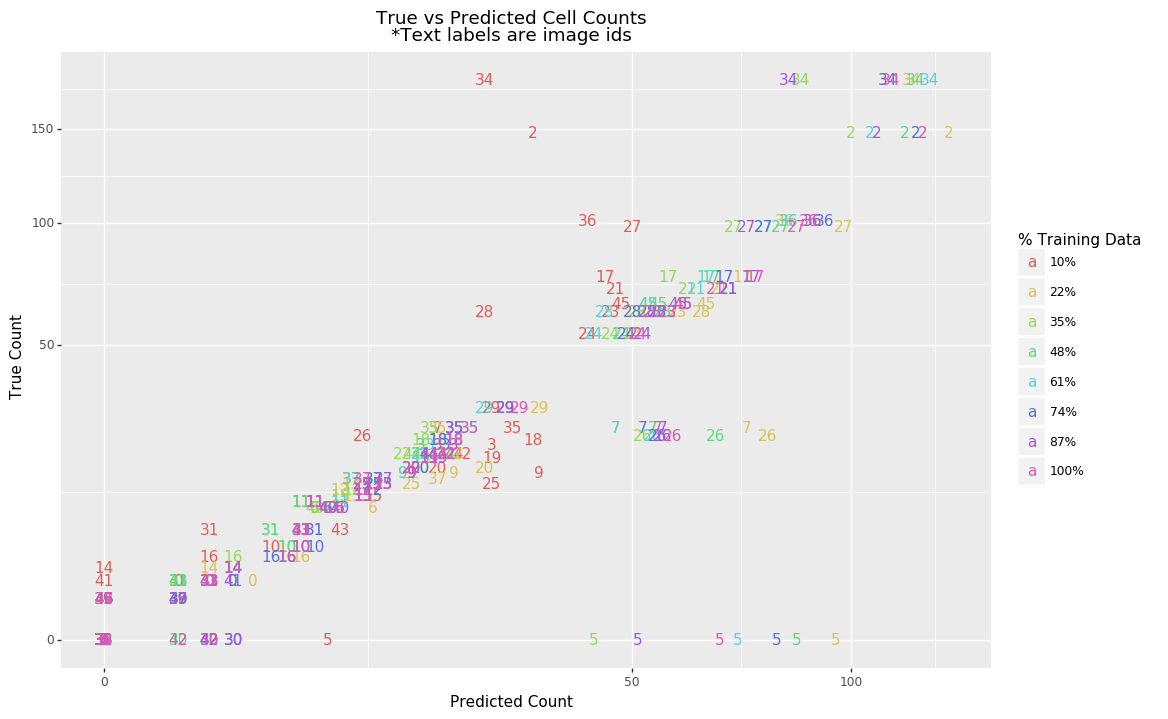

<ggplot: (-9223363286806490764)>

In [194]:
p = (
    pn.ggplot(
        df_ct, 
        pn.aes(x='pred_ct', y='true_ct', color='pct_label', label='image_id')
    ) +
    pn.geom_text() +
    pn.scale_x_sqrt() +
    pn.scale_y_sqrt() +
    pn.scale_color_discrete(guide=pn.guide_legend(title='% Training Data')) +
    pn.ylab('True Count') +
    pn.xlab('Predicted Count') +
    pn.ggtitle('True vs Predicted Cell Counts\n*Text labels are image ids') +
    pn.theme(figure_size=(12, 8)) 
)
pn.ggsave(p, res_path('cell_count_true_vs_pred_by_pct_dataset_size.png'))
p

In [199]:
df_hard_cases = df_ct[df_ct['image_id'].isin([5, 26, 7, 42])][['image_id', 'image_info']].drop_duplicates()
df_hard_cases.set_index('image_id')['image_info'].to_dict()

{5: '/lab/data/celldom/data/dataset02/BF_ST_002_APT_005Day4.jpg',
 7: '/lab/data/celldom/data/dataset02/BF_ST_002_APT_008Day4.jpg',
 26: '/lab/data/celldom/data/dataset02/BF_ST_002_APT_004Day4.jpg',
 42: '/lab/data/celldom/data/dataset02/BF_ST_003_APT_000Day0.jpg'}

/usr/local/lib/python3.5/dist-packages/plotnine/ggplot.py:688: UserWarning: Saving 12 x 8 in image.
  from_inches(height, units), units))
/usr/local/lib/python3.5/dist-packages/plotnine/ggplot.py:689: UserWarning: Filename: results/dataset_size_vs_accuracy/cell_count_true_vs_pred_all_train_data.png
  warn('Filename: {}'.format(filename))


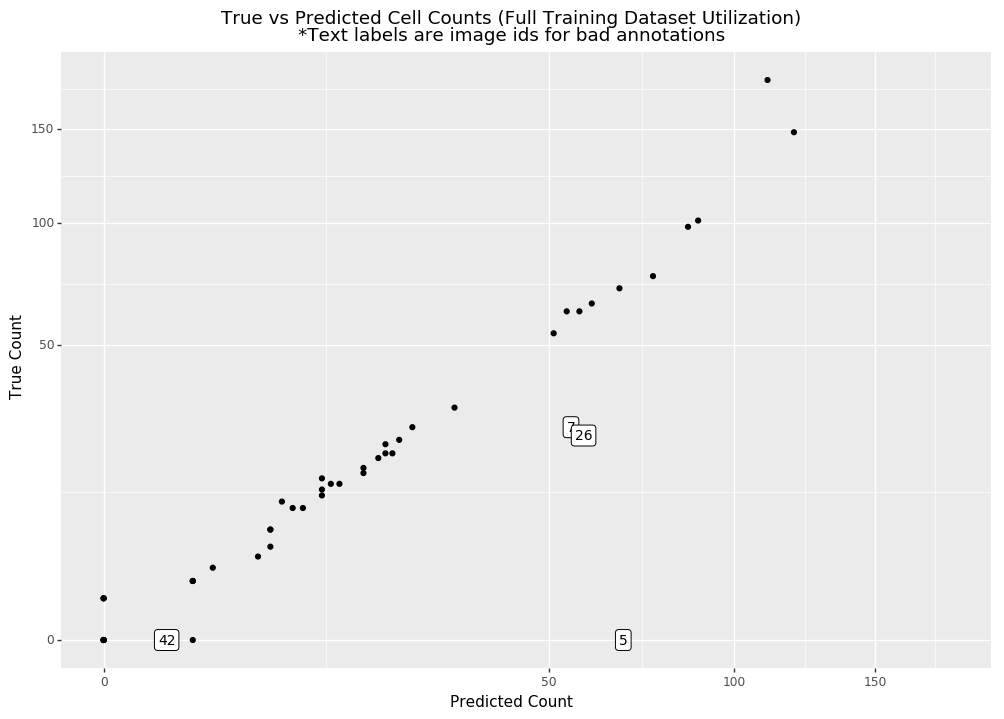

<ggplot: (-9223363286902207919)>

In [237]:
p = (
    pn.ggplot(
        df_ct
            .assign(label=np.where(df_ct['image_id'].isin(df_hard_cases['image_id']), df_ct['image_id'], ''))
            [df_ct['pct'] == 100], 
        pn.aes(x='pred_ct', y='true_ct', label='label')
    ) +
    pn.geom_point() +
    pn.geom_label(size=10) +
    pn.scale_x_sqrt(limits=(0, 180)) +
    pn.scale_y_sqrt(limits=(0, 180)) +
    pn.scale_color_discrete(guide=pn.guide_legend(title='% Training Data')) +
    pn.ylab('True Count') +
    pn.xlab('Predicted Count') +
    pn.ggtitle('True vs Predicted Cell Counts (Full Training Dataset Utilization)\n*Text labels are image ids for bad annotations') +
    pn.theme(figure_size=(12, 8))
)
pn.ggsave(p, res_path('cell_count_true_vs_pred_all_train_data.png'))
p

In [239]:
df_ct_bin = df_ct[df_ct['pct'] == 100].copy()
df_ct_bin = df_ct_bin[~df_ct_bin['image_id'].isin(df_hard_cases['image_id'])]
df_ct_bin = df_ct_bin[df_ct_bin['true_ct'] >= 5]
pct_diffs = (100 * (df_ct_bin['pred_ct'] - df_ct_bin['true_ct']) / df_ct_bin['true_ct'])
pct_diffs = pct_diffs.describe(percentiles=[.05, .1, .25, .5, .75, .9, .95]).round(1).rename('Percent Difference')
pct_diffs.index.name = 'Statistic'
pct_diffs.reset_index()

,Statistic,Percent Difference
0,count,28.0
1,mean,-3.8
2,std,11.3
3,min,-27.3
4,5%,-17.5
5,10%,-12.4
6,25%,-8.3
7,50%,-5.0
8,75%,0.0
9,90%,1.5


<Figure size 432x288 with 0 Axes>

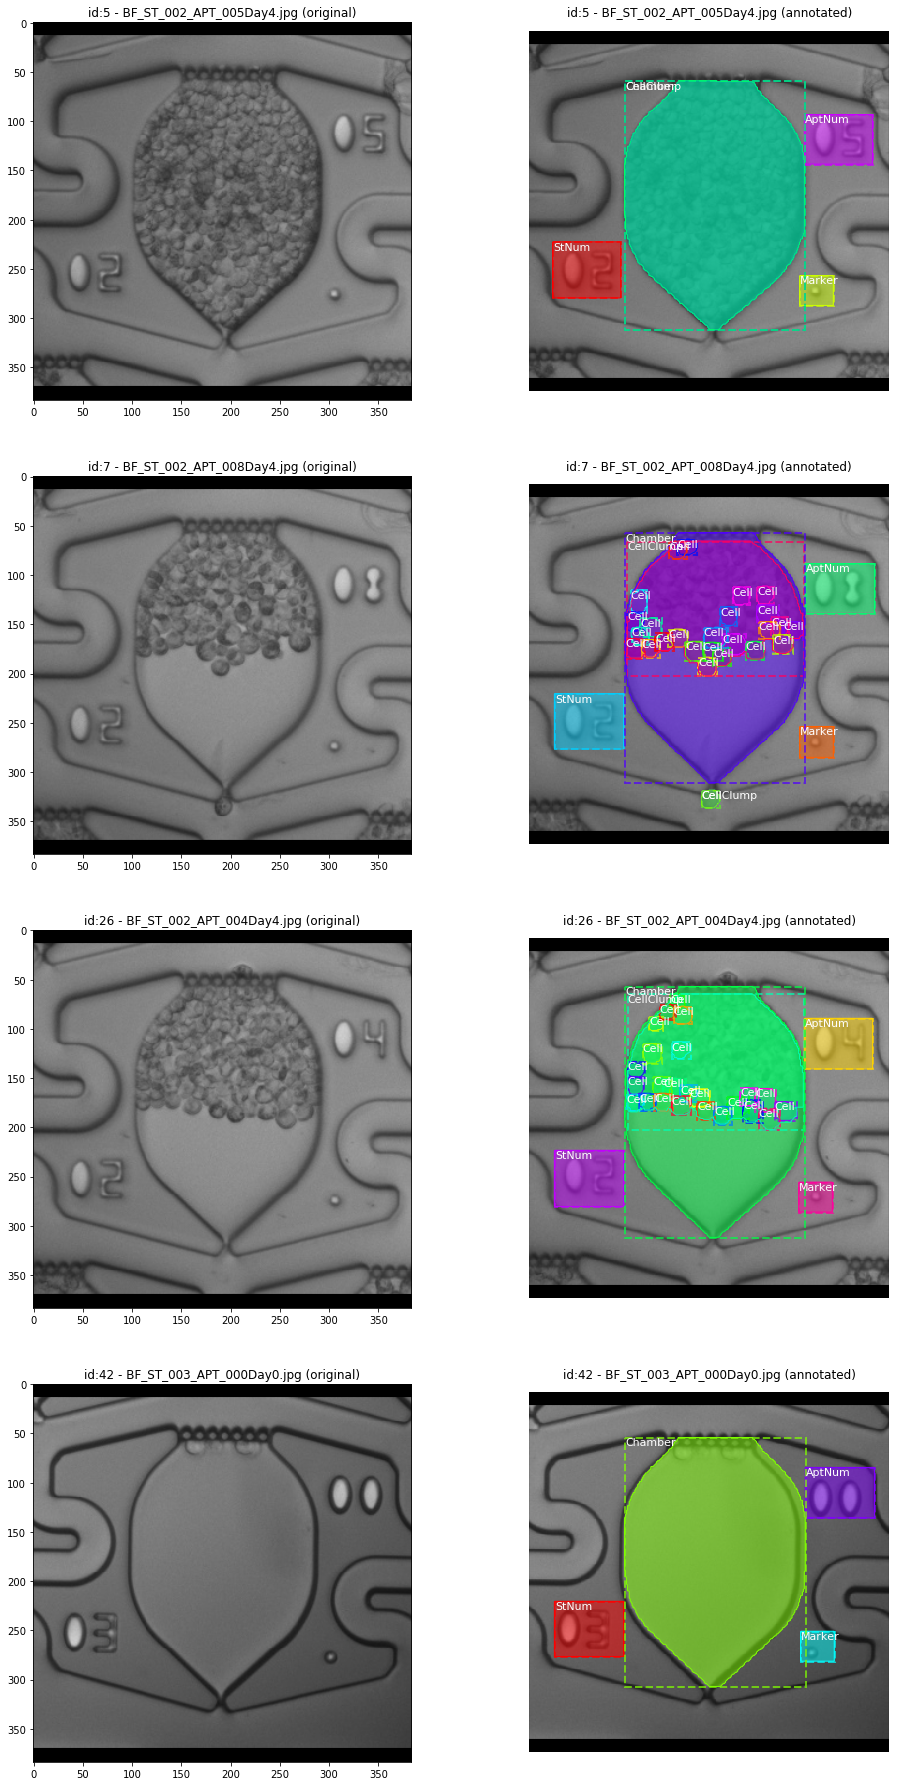

In [204]:
%run config01.py
from mrcnn import visualize as mrcnn_viz
from mrcnn import model as mrcnn_model_lib
from celldom.dataset import CelldomDataset
import matplotlib.pyplot as plt

def plot_images(image_paths, image_ids):
    config = CelldomTrainingConfig()
    dataset_eda = CelldomDataset()
    dataset_eda.initialize(image_paths, CLASS_NAMES)
    dataset_eda.prepare()
    
    n = len(image_paths)
    fig, axs = plt.subplots(n, 2)
    figsize = (16, n * 8)
    fig.set_size_inches(figsize)
    for i, p in enumerate(image_paths):
        axs[i][0].set_title('id:{} - {} (original)'.format(image_ids[i], osp.basename(p)))
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            mrcnn_model_lib.load_image_gt(dataset_eda, config, i, use_mini_mask=False)
        axs[i][0].imshow(image)
        mrcnn_viz.display_instances(
            image, gt_bbox, gt_mask, gt_class_id, 
            dataset_eda.class_names, ax=axs[i][1], 
            figsize=figsize, title='id:{} - {} (annotated)'.format(image_ids[i], osp.basename(p)))
    return fig
        
plot_images(df_hard_cases['image_info'].values, df_hard_cases['image_id'].values)
plt.savefig(res_path('bad_annotations.png'))

In [85]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, mean_squared_log_error

def get_ct_stats(g):
    yt, yp = g['pred_ct'], g['true_ct']
    return pd.Series(dict(
        mean_absolute_error=mean_absolute_error(yt, yp),
        median_absolute_error=median_absolute_error(yt, yp),
        r2=r2_score(yt, yp),
        mean_squared_error=mean_squared_error(yt, yp),
        mean_squared_log_error=mean_squared_log_error(yt, yp)
    ))
df_ct_stat = df_ct.groupby('pct_label').apply(get_ct_stats).reset_index().melt(id_vars='pct_label')
df_ct_stat['pct_label'] = pd.Categorical(df_ct_stat['pct_label'], categories=df_ct.pct_label.cat.categories, ordered=True)
df_ct_stat.head()

,pct_label,variable,value
0,10%,mean_absolute_error,13.437500
1,22%,mean_absolute_error,7.937500
2,35%,mean_absolute_error,8.416667
3,48%,mean_absolute_error,7.500000
4,61%,mean_absolute_error,7.604167


/usr/local/lib/python3.5/dist-packages/plotnine/ggplot.py:688: UserWarning: Saving 12 x 6 in image.
  from_inches(height, units), units))
/usr/local/lib/python3.5/dist-packages/plotnine/ggplot.py:689: UserWarning: Filename: results/dataset_size_vs_accuracy/cell_count_error_vs_data_size.png
  warn('Filename: {}'.format(filename))


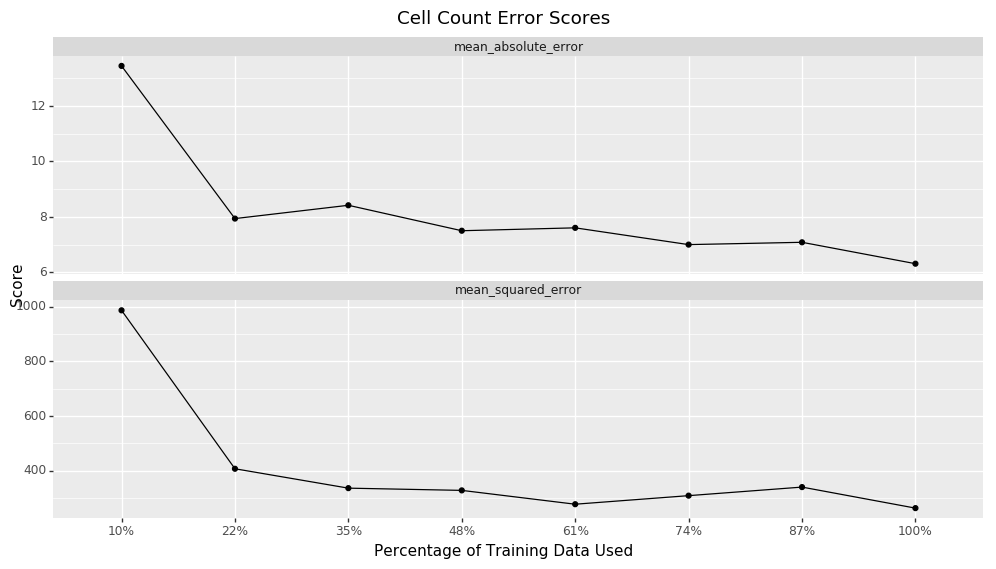

<ggplot: (-9223363286901757089)>

In [139]:
p = (
    pn.ggplot(
        df_ct_stat[df_ct_stat['variable'].isin(['mean_absolute_error', 'mean_squared_error'])], 
        pn.aes(x='pct_label', y='value', group=1)
    ) +
    pn.geom_line() +
    pn.geom_point() +
    pn.xlab('Percentage of Training Data Used') +
    pn.ylab('Score') +
    pn.ggtitle('Cell Count Error Scores') +
    pn.facet_wrap('~variable', ncol=1, scales='free_y') +
    pn.theme(figure_size=(12, 6))
)
pn.ggsave(p, res_path('cell_count_error_vs_data_size.png'))
p

In [46]:
def get_mask_scores(r):
    score_classes = ['cellclump', 'cell', 'cellunion', 'chamber', 'aptnum', 'stnum']
    ct = r['counts']
    res = []
    for sc in score_classes:
        res.append(dict(
            class_name=sc,
            pred_status=r['scores_' + sc]['pred_status'],
            true_status=r['scores_' + sc]['true_status'],
            dice=r['scores_' + sc]['dice'],
            jaccard=r['scores_' + sc]['jaccard']
        ))
    return res

df_scores = extract_df(stats, get_mask_scores)
df_scores.head()

,class_name,dice,image_id,image_info,jaccard,pct,pred_status,true_status,pct_label
0,cellclump,NaN,0,/lab/data/celldom/data/dataset02/BF_ST_000_APT...,NaN,48,Empty,Valid,48%
1,cell,0.903904,0,/lab/data/celldom/data/dataset02/BF_ST_000_APT...,0.999132,48,Valid,Valid,48%
2,cellunion,0.832765,0,/lab/data/celldom/data/dataset02/BF_ST_000_APT...,0.998338,48,Valid,Valid,48%
3,chamber,0.978541,0,/lab/data/celldom/data/dataset02/BF_ST_000_APT...,0.988749,48,Valid,Valid,48%
4,aptnum,0.917480,0,/lab/data/celldom/data/dataset02/BF_ST_000_APT...,0.995816,48,Valid,Valid,48%


/usr/local/lib/python3.5/dist-packages/plotnine/ggplot.py:688: UserWarning: Saving 12 x 6 in image.
  from_inches(height, units), units))
/usr/local/lib/python3.5/dist-packages/plotnine/ggplot.py:689: UserWarning: Filename: results/dataset_size_vs_accuracy/cell_union_vs_cell_clump.png
  warn('Filename: {}'.format(filename))


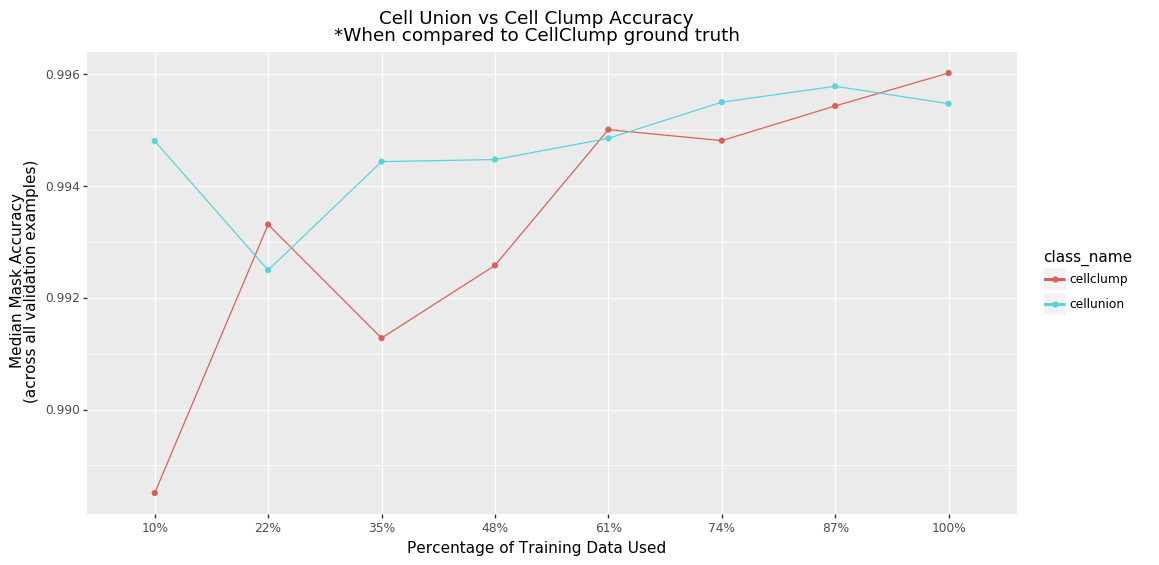

<ggplot: (8750048037538)>

In [140]:
p = (
    pn.ggplot(
        df_scores[df_scores['class_name'].isin(['cellclump', 'cellunion'])]\
            .groupby(['class_name', 'pct_label'])['jaccard'].median().rename('score').reset_index(), 
        pn.aes(x='pct_label', y='score', color='class_name', group='class_name')
    ) +
    pn.geom_point() + pn.geom_line() +
    pn.ylab('Median Mask Accuracy\n(across all validation examples)') +
    pn.xlab('Percentage of Training Data Used') +
    pn.ggtitle('Cell Union vs Cell Clump Accuracy\n*When compared to CellClump ground truth') +
    pn.theme(figure_size=(12, 6))
)
pn.ggsave(p, res_path('cell_union_vs_cell_clump.png'))
p

/usr/local/lib/python3.5/dist-packages/plotnine/ggplot.py:688: UserWarning: Saving 16 x 6 in image.
  from_inches(height, units), units))
/usr/local/lib/python3.5/dist-packages/plotnine/ggplot.py:689: UserWarning: Filename: results/dataset_size_vs_accuracy/mask_accuracy.png
  warn('Filename: {}'.format(filename))


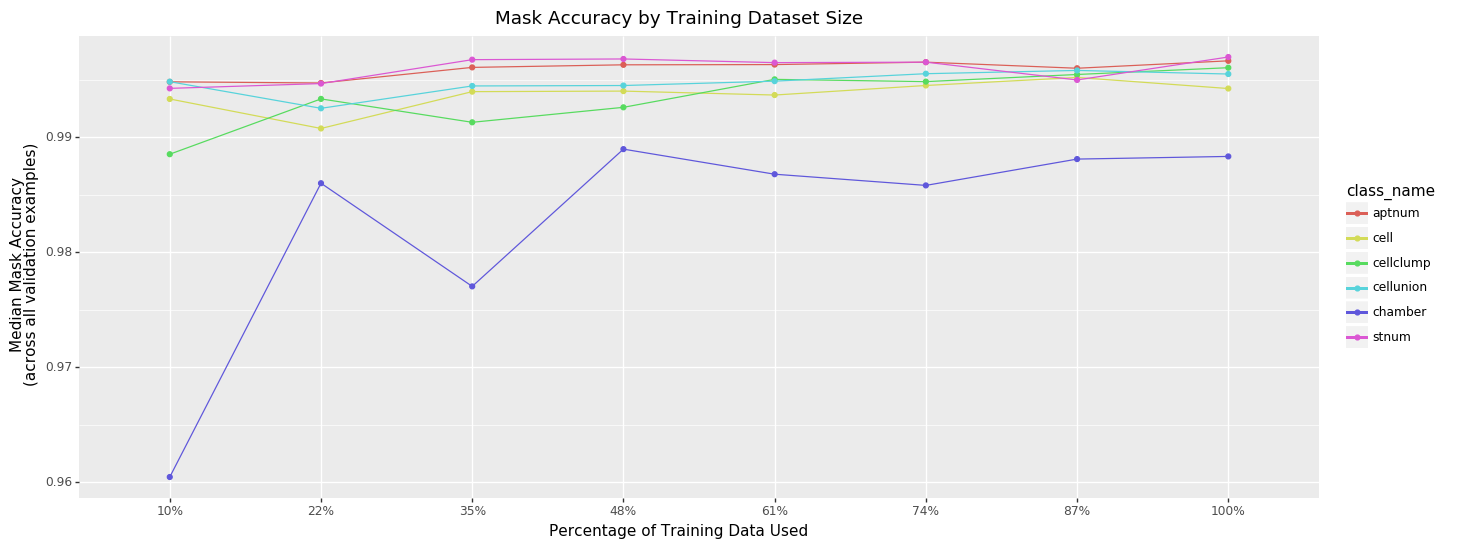

<ggplot: (-9223363286806409356)>

In [141]:
p = (
    pn.ggplot(
        df_scores
            .groupby(['class_name', 'pct_label'])['jaccard']
            .median().rename('score').reset_index(),
        pn.aes(x='pct_label', y='score', color='class_name', group='class_name')
    ) +
    pn.ylab('Median Mask Accuracy\n(across all validation examples)') +
    pn.xlab('Percentage of Training Data Used') +
    pn.ggtitle('Mask Accuracy by Training Dataset Size') +
    pn.geom_line() + pn.geom_point() +
    pn.theme(figure_size=(16, 6))
)
pn.ggsave(p, res_path('mask_accuracy.png'))
p